example
0
hub -> repeat
1
repeat -> end1
2
end1 -> repeat
3
repeat -> end2
4
repeat -> end2
5
end2 -> repeat
6

repeat 0~6
end1 1~3
end2 3~6

In [156]:
import random
ontimes_child = []
ontimes_repeat = []
success_rate_array = []
# endとrepeatの通信は最小でsend_delay、最大でtimeout
child_num = 10
simulation_num = 1000
time_span = 600
max_retry = 7
retry_p = 0.5
retry_sum = 0
send_delay = 1
send_timeout_delay = 3
# time_error_wait_time = 1
for child_num in range(1, 250):
    time = 0
    success_rate = 0
    start_time_for_this_cycle = time
    alive = [True]*child_num
    ontime = [0]*(child_num+1)
    wakeup_time = [0]*(child_num+1)
    for i in range(1,child_num+1):
        # wakeup_time[i] = send_delay*2*i-time_error_wait_time 
        # wakes up at this time on their clock, but in reality it's send_delay*2*i
        # because the time is delayed due to sending delay
        wakeup_time[i] = send_delay*2*i - send_delay


    for _ in range(simulation_num):
        start_time_for_this_cycle = time
        time = round(time+1,2)


        for child_id in range(child_num):
            if alive[child_id]:
                # repeat->end
                retry_num = 0
                # get retry count
                for i in range(max_retry):
                    if random.random()>retry_p:
                        break
                    else:
                        retry_num += 1
                
                # add time
                retry_sum += retry_num
                time = round(time+send_delay*(1+retry_num),2)
            
                if retry_num == max_retry and random.random()<=retry_p:
                    # communication failed
                    pass
                else:
                    # end->repeat
                    retry_num = 0
                    # get retry count
                    for i in range(max_retry):
                        if random.random()>retry_p:
                            break
                        else:
                            retry_num += 1

                    # add time
                    retry_sum += retry_num 
                    time = round(time+send_delay*(1+retry_num),2)
                    if retry_num == max_retry and random.random()<=retry_p:
                        pass
                    else:
                        success_rate += 1
                # add ontime the time on
                # if time - start_time_for_this_cycle > time_span:
                #     break

                ontime[child_id+1] += (time%time_span-wakeup_time[child_id+1])
                
                # print(time,wakeup_time[child_id+1])
                if time%time_span-wakeup_time[child_id+1] <=0:
                    print("warning")

            else:
                # timeout
                time = round(time+send_timeout_delay,2)
            if time - start_time_for_this_cycle > time_span:
                print(child_num,time,start_time_for_this_cycle)
                break
        if time - start_time_for_this_cycle > time_span:
            print(child_num,time,start_time_for_this_cycle)
            continue
        ontime[0] += (time%time_span-wakeup_time[0])+1 #+1 is for repeat->hub

        time = round(time+(time_span-time%time_span),2)
        start_time_for_this_cycle = time


    for i in range(len(ontime)):
        ontime[i] /= simulation_num

    ontimes_child.append(sum(ontime[1:])/child_num)
    ontimes_repeat.append(ontime[0])
    success_rate_array.append(success_rate/(simulation_num*child_num))
print(ontimes_child)

ontimes_repeat_request = ontimes_repeat
ontimes_child_request = ontimes_child
success_rate_array_request = success_rate_array

child_num: 249
simulation_num: 10
time_span: 600
send_delay: 1
time_span: 600
repeat on time


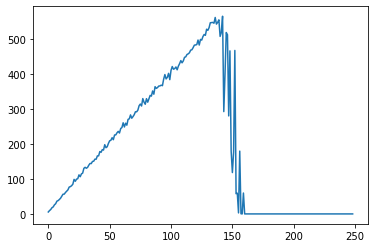

child average on time


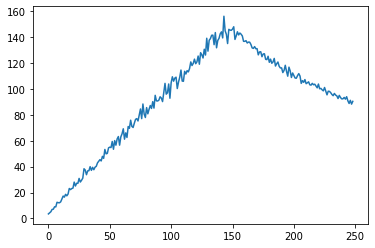

success rate for repeat <-> child


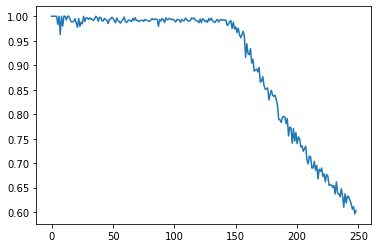

In [ ]:
import matplotlib.pyplot as plt
print("child_num: "+str(child_num))
print("simulation_num: "+str(simulation_num))
print("time_span: "+str(time_span))
print("send_delay: "+str(send_delay))
print("time_span: "+str(time_span))

print("repeat on time")
plt.plot(ontimes_repeat)
plt.show()
print("child average on time")
plt.plot(ontimes_child)
plt.show()
print("success rate for repeat <-> child")
plt.plot(success_rate_array)
plt.show()


In [151]:
ontimes_repeat[130:140]

[521.38, 530.06, 534.43, 534.09, 171.46, 545.36, 350.92, 125.89, 253.68, 5.78]

example

0
hub -> repeat
1
repeat -> all end
2
end1 -> repeat
3
(end1 -> repeat)
4
(end1 -> repeat)
5
end2 -> repeat
6
end2 -> repeat
7
(end2 -> repeat)
8

repeat 0~8
end1 1~3
end2 1, 3~6

In [131]:
import random
ontimes_child = []
ontimes_repeat = []
success_rate_array = []
# endとrepeatの通信は最小でsend_delay、最大でtimeout
child_num = 10
simulation_num = 100
time_span = 600
max_retry = 6
retry_p = 0.5
retry_sum = 0
send_delay = 1
send_timeout_delay = 3
# time_error_wait_time = 1
for child_num in range(1, 100):
    time = 0
    start_time_for_this_cycle = time
    success_rate = 0

    alive = [True]*child_num
    ontime = [0]*(child_num+1)
    wakeup_time = [0]*(child_num+1)
    for i in range(1,child_num+1):
        # wakeup_time[i] = send_delay*2*i-time_error_wait_time 
        # wakes up at this time on their clock, but in reality it's send_delay*2*i
        # because the time is delayed due to sending delay
        wakeup_time[i] = send_delay*2 + send_delay*(1+max_retry)*(i-1)

    for _ in range(simulation_num):

        time = round(time+send_delay*2,2)

        for child_id in range(child_num):
            if alive[child_id]:
                # end->repeat
                retry_num = 0
                # get retry count
                for i in range(max_retry):
                    if random.random()>retry_p:
                        break
                    else:
                        retry_num += 1
                
                # add time
                retry_sum += retry_num
                time = round(time+send_delay*(1+retry_num),2)
            
                if retry_num == max_retry and random.random()<=retry_p:
                    # communication failed
                    pass
                else:
                    success_rate += 1

                # add ontime the time on
                ontime[child_id+1] += (time%time_span-wakeup_time[child_id+1]) + send_delay # add the time to receive now time
                # print(time,wakeup_time[child_id+1])
                if time%time_span-wakeup_time[child_id+1] <=0:
                    print("warning")
                    
                
                time = round(time+send_delay*(max_retry-retry_num),2)

            else:
                # timeout
                time = round(time+send_timeout_delay,2)
        if time - start_time_for_this_cycle > time_span:
            print(child_num,time,start_time_for_this_cycle)
            continue
        ontime[0] += (time%time_span-wakeup_time[0])+1 #+1 is for repeat->hub

        time = round(time+(time_span-time%time_span),2)
        start_time_for_this_cycle = time


    for i in range(len(ontime)):
        ontime[i] /= simulation_num
    ontimes_child.append(sum(ontime[1:])/child_num)
    ontimes_repeat.append(ontime[0])
    success_rate_array.append(success_rate/(simulation_num*child_num))
print(ontimes_child)

ontimes_repeat_timeslot = ontimes_repeat
ontimes_child_timeslot = ontimes_child
success_rate_array_timeslot = success_rate_array


86 604 0
warning
86 1208 0
warning
warning
86 1812 0
warning
warning
86 2416 0
warning
warning
warning
86 3020 0
warning
warning
warning
86 3624 0
warning
warning
warning
warning
86 4228 0
warning
warning
warning
warning
86 4832 0
warning
warning
warning
warning
warning
warning
86 5436 0
warning
warning
warning
warning
warning
86 6040 0
warning
warning
warning
warning
warning
warning
86 6644 0
warning
warning
warning
warning
warning
warning
warning
86 7248 0
warning
warning
warning
warning
warning
warning
warning
86 7852 0
warning
warning
warning
warning
warning
warning
warning
warning
86 8456 0
warning
warning
warning
warning
warning
warning
warning
warning
86 9060 0
warning
warning
warning
warning
warning
warning
warning
warning
warning
86 9664 0
warning
warning
warning
warning
warning
warning
warning
warning
warning
86 10268 0
warning
warning
warning
warning
warning
warning
warning
warning
warning
warning
86 10872 0
warning
warning
warning
warning
warning
warning
warning
warning
war

child_num: 99
simulation_num: 100
time_span: 600
send_delay: 1
time_span: 600
repeat on time


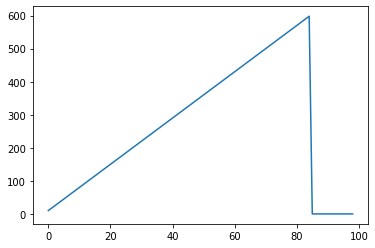

child average on time


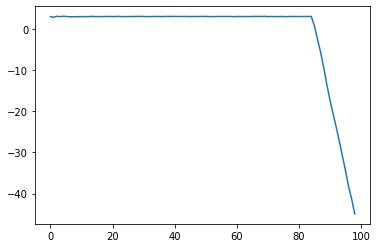

success rate for repeat <-> child


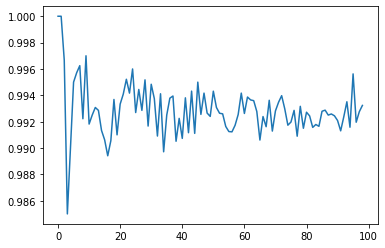

In [132]:
import matplotlib.pyplot as plt
print("child_num: "+str(child_num))
print("simulation_num: "+str(simulation_num))
print("time_span: "+str(time_span))
print("send_delay: "+str(send_delay))
print("time_span: "+str(time_span))

print("repeat on time")
plt.plot(ontimes_repeat)
plt.show()
print("child average on time")
plt.plot(ontimes_child)
plt.show()
print("success rate for repeat <-> child")
plt.plot(success_rate_array)
plt.show()

# fig = plt.figure(figsize = (10,20))

# ax1 = fig.add_subplot(3, 1, 1)
# ax2 = fig.add_subplot(3, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# ax1.plot(ontimes_repeat)
# ax2.plot(ontimes_child)
# ax3.plot(success_rate_array)

# ax1.set_title("repeat on-time")
# ax2.set_title("end average on-time")
# ax3.set_title("success rate for repeat <-> end")

# ax1.set_xlabel("retry probability")
# ax2.set_xlabel("retry probability")
# ax3.set_xlabel("retry probability")

# ax1.set_ylabel("(s)")
# ax2.set_ylabel("(s)")

# plt.show()

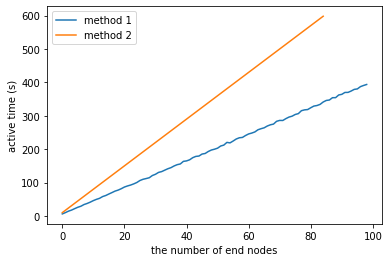

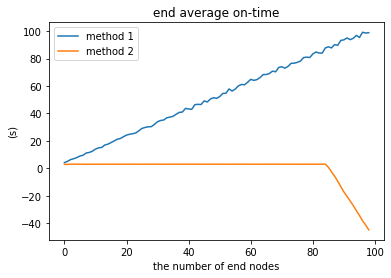

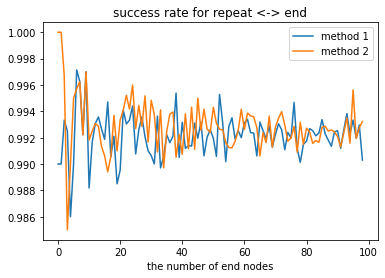

In [133]:
plt.figure(facecolor="white")
plt.plot(ontimes_repeat_request, label="method 1")
plt.plot(ontimes_repeat_timeslot[:85], label="method 2")
plt.legend()
# plt.title("repeat on-time")
plt.xlabel("the number of end nodes")
plt.ylabel("active time (s)")
plt.show()

plt.figure(facecolor="white")
plt.plot(ontimes_child_request, label="method 1")
plt.plot(ontimes_child_timeslot, label="method 2")
plt.legend()
plt.title("end average on-time")
plt.xlabel("the number of end nodes")
plt.ylabel("(s)")
plt.show()

plt.figure(facecolor="white")
plt.plot(success_rate_array_request, label="method 1")
plt.plot(success_rate_array_timeslot, label="method 2")
plt.legend()
plt.title("success rate for repeat <-> end")
plt.xlabel("the number of end nodes")
# plt.ylabel("(s)")
plt.show()

you could decide max retry based on the acceptable success rate

you could decide max retry based on the acceptable success rate